參考文章 : https://github.com/andy6804tw/2021-13th-ironman/tree/main/11.SVM

In [2]:
#pip install seaborn

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\Users\bluesky\AppData\Local\Programs\Python\Python39\python.exe -m pip install --upgrade pip' command.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris

# 載入資料

In [2]:
iris = load_iris()
df_data = pd.DataFrame(data= np.c_[iris['data'], iris['target']],
                     columns= ['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm','Species']) #np.c_ 合併資料，這邊類似R的cbind
df_data

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2.0
146,6.3,2.5,5.0,1.9,2.0
147,6.5,3.0,5.2,2.0,2.0
148,6.2,3.4,5.4,2.3,2.0


# 分割訓練集與測試集

In [3]:
from sklearn.model_selection import train_test_split
X = df_data.drop(labels=['Species'],axis=1).values # 移除Species並取得剩下欄位資料
y = df_data['Species'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y) #stratify = y : 根據數據y中各類數據比例，分配給train和test，使得各類數據比例和原數據集一樣。

print('train shape:', X_train.shape)
print('test shape:', X_test.shape)

train shape: (105, 4)
test shape: (45, 4)


# 繪製決策邊界 Function

In [4]:
def make_meshgrid(x, y, h=.02):
    """Create a mesh of points to plot in

    Parameters
    ----------
    x: data to base x-axis meshgrid on
    y: data to base y-axis meshgrid on
    h: stepsize for meshgrid, optional

    Returns
    -------
    xx, yy : ndarray
    """
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    return xx, yy


def plot_contours(ax, clf, xx, yy, **params):
    """Plot the decision boundaries for a classifier.

    Parameters
    ----------
    ax: matplotlib axes object
    clf: a classifier
    xx: meshgrid ndarray
    yy: meshgrid ndarray
    params: dictionary of params to pass to contourf, optional
    """
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out

# PCA降維

In [5]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2, iterated_power=1) #降成2維，方便作圖
train_reduced = pca.fit_transform(X_train)

### sklearn.decomposition.PCA
- n_components : PCA算法中要保留的主成分個數
  - 可賦值為string,如n_components='mle', 會自動選取特徵個數n, 使得滿足所要求的方差百分比
- copy : bool, True or False, 缺少時默認True
  - 表示是否在運行算法時，將原始訓練數據複製一份。若為 True，運行PCA後, 原始訓練數據的值不會有任何改變, 因為是在原始數據的副本上進行運算的。
- iterated_power : 冪方法的迭代次數, 默認為3
- whiten : bool,省略時為False. 白化,對降維後的數據的每個特徵進行歸一化，讓方差都為1.

# 支持向量機 (Support Vector Machine, SVM) 模型

SVM 能夠透過 C 來達到 weight regularization 來限制模型的複雜度。除了這點我們還能透過 SVM 的 Kernel trick 的方式將資料做非線性轉換，常見的 kernel 除了 linear 線性以外還有兩了非線性的 Polynomial 高次方轉換以及 Radial Basis Function 高斯轉換。

### Kernel
* 當不同類別的資料在原始空間中無法被線性分類器區隔開來時，經由非線性投影後的資料能在更高維度的空間中可以更區隔開。



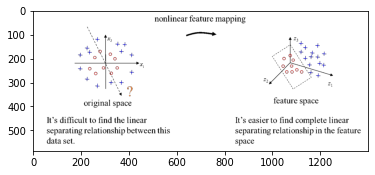

In [6]:
plt.imshow(plt.imread("D:/github/kernel1.PNG"))

### 四種不同SVC分類器:

1. LinearSVC (線性)
2. kernel='linear' (線性)
3. kernel='poly' (非線性)
4. kernel='rbf' (非線性)

### Methods:

* fit: 放入X、y進行模型擬合。
* predict: 預測並回傳預測類別。
* score: 預測成功的比例。
* predict_proba: 預測每個類別的機率值。

## LinearSVC
#### Parameters:

- C: 限制模型的複雜度，防止過度擬合。
- max_iter: 最大迭代次數，預設1000。 

In [9]:
from sklearn import svm

# 建立 linearSvc 模型
linearSvcModel=svm.LinearSVC(C=1, max_iter=10000)
# 使用訓練資料訓練模型
linearSvcModel.fit(train_reduced, y_train)
# 使用訓練資料預測分類
predicted=linearSvcModel.predict(train_reduced)
# 計算準確率
accuracy = linearSvcModel.score(train_reduced, y_train)



Text(0.5, 1.0, 'LinearSVC (linear kernel)\nAccuracy:0.96')

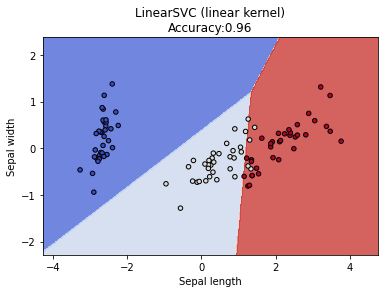

In [10]:
X0, X1 = train_reduced[:, 0], train_reduced[:, 1]  #PC1, PC2
xx, yy = make_meshgrid(X0, X1) #網格
plot_contours(plt, linearSvcModel, xx, yy,
                  cmap=plt.cm.coolwarm, alpha=0.8) #畫背景
plt.scatter(X0, X1, c=y_train, cmap=plt.cm.coolwarm, s=20, edgecolors='k')  #s:圓圈大小
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.title('LinearSVC (linear kernel)'+ '\n' + 'Accuracy:%.2f'%accuracy)

In [28]:
print(np.meshgrid(np.arange(1, 2, 0.2),np.arange(1, 2, 0.2)))  #


[array([[1. , 1.2, 1.4, 1.6, 1.8],
       [1. , 1.2, 1.4, 1.6, 1.8],
       [1. , 1.2, 1.4, 1.6, 1.8],
       [1. , 1.2, 1.4, 1.6, 1.8],
       [1. , 1.2, 1.4, 1.6, 1.8]]), array([[1. , 1. , 1. , 1. , 1. ],
       [1.2, 1.2, 1.2, 1.2, 1.2],
       [1.4, 1.4, 1.4, 1.4, 1.4],
       [1.6, 1.6, 1.6, 1.6, 1.6],
       [1.8, 1.8, 1.8, 1.8, 1.8]])]


In [33]:
print(xx.ravel())
print(np.c_[xx.ravel(),yy.ravel()]) #把網格變成[X,Y]

[-4.26845324 -4.24845324 -4.22845324 ...  4.71154676  4.73154676
  4.75154676]
[[-4.26845324 -2.28491222]
 [-4.24845324 -2.28491222]
 [-4.22845324 -2.28491222]
 ...
 [ 4.71154676  2.37508778]
 [ 4.73154676  2.37508778]
 [ 4.75154676  2.37508778]]


In [42]:
test = linearSvcModel.predict(np.c_[xx.ravel(),yy.ravel()])
print(test)
print('-'*50)
print(test.reshape(xx.shape)) #放入對應的位置

[1. 1. 1. ... 2. 2. 2.]
--------------------------------------------------
[[1. 1. 1. ... 2. 2. 2.]
 [1. 1. 1. ... 2. 2. 2.]
 [1. 1. 1. ... 2. 2. 2.]
 ...
 [0. 0. 0. ... 2. 2. 2.]
 [0. 0. 0. ... 2. 2. 2.]
 [0. 0. 0. ... 2. 2. 2.]]
